## Calculate grades of students by combining data from multiple sources using Pandas

Data is derived from:
* Roster
* Homework & Exam grades
* Quiz grades

In [62]:
# Import libraries
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

### Load and clean files

In [63]:
# Create constant DATA_FOlDER
HERE = Path("gradebook.ipynb").parent
DATA_FOLDER = HERE / "data"

In [64]:
# Load the roster file
roster = pd.read_csv("data/roster.csv")

In [65]:
# Select only NetID, Email Address, and Section
roster = roster[["NetID", "Email Address", "Section"]]

In [66]:
# Change NetID and Email Address from Uppercase to Lowercase
roster["NetID"] = roster["NetID"].str.lower()
roster["Email Address"] = roster["Email Address"].str.lower()

In [67]:
# Set index for the DataFrame
roster.set_index("NetID", inplace=True)

In [68]:
# Check roster DataFrame
roster

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2
...,...,...
pmj37756,paul.johnson@univ.edu,3
dsl24347,danielle.lee@univ.edu,3
nxe44872,nicole.edwards@univ.edu,3


In [69]:
# Load the homework and exam grades file
# Filters column names that contains "Submission"
hw_exam_grades = pd.read_csv("data/hw_exam_grades.csv", usecols= lambda x: "Submission" not in x)

In [70]:
# Change SID from Uppercase to Lowercase
hw_exam_grades["SID"] = hw_exam_grades["SID"].str.lower()

# Set index for the DataFrame
hw_exam_grades.set_index("SID", inplace=True)

In [71]:
# Check hw_exam_grades DataFrame
hw_exam_grades

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
txw75701,Travis,Washington,64.0,80,67,80,56,80,92,100,...,40,60,52,60,94,100,74,100,68,100
tbr17292,Troy,Raymond,50.0,80,59,80,79,80,98,100,...,45,60,49,60,91,100,67,100,100,100
vkb66346,Victoria,Boyd,58.0,80,61,80,75,80,99,100,...,40,60,50,60,68,100,93,100,69,100


In [72]:
# Load and join the quiz grade files
quiz_grades = pd.DataFrame()

# Find all the quiz CSV files and load them with pandas
for file_path in DATA_FOLDER.glob("quiz_*_grades.csv"):
    # Create new quiz name for columns
    quiz_name = " ".join(file_path.stem.title().split("_")[:2])
    # Load the files
    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=["Email"],
        usecols=["Email", "Grade"],
    ).rename(columns={"Grade": quiz_name})
    # Assign data to each student
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)

In [73]:
# Check quiz_grades DataFrame
quiz_grades

,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3
Email,,,,,
rachel.dennis@univ.edu,11,6,6,7,7
courtney.wolf@univ.edu,9,15,7,10,9
aaron.lester@univ.edu,8,9,8,6,10
ashley.martin@univ.edu,11,7,13,5,8
jessica.garza@univ.edu,10,8,11,8,16
...,...,...,...,...,...
brandy.reilly@univ.edu,10,13,14,5,6
douglas.payne@univ.edu,5,7,12,8,7
tara.johnson@univ.edu,12,6,14,6,10


### Merge DataFrames

In [74]:
# Merge roster and hw_exam_grades DataFrames as final_data
final_data = pd.merge(roster, hw_exam_grades, left_index=True, right_index=True)

# Check final_data
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,45,60,46,60,86,100,62,100,90,100
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,45,60,37,60,60,100,91,100,93,100
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,59,60,53,60,100,100,84,100,64,100
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,42,60,40,60,72,100,83,100,77,100
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,59,60,48,60,96,100,80,100,86,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,40,60,51,60,84,100,80,100,94,100
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,49,60,57,60,62,100,70,100,90,100
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,58,60,51,60,89,100,63,100,65,100
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,41,60,46,60,90,100,72,100,71,100


In [75]:
# Merge final_data with quiz_grades
final_data = pd.merge(final_data, quiz_grades, left_on="Email Address", right_index=True)

# Check final_data
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,10,10,7,4,11
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,6,10,13,8,10
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,100,84,100,64,100,4,6,9,8,14
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,5,8,13,8,8
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,7,14,7,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,100,80,100,94,100,10,14,11,10,9
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,100,70,100,90,100,7,14,5,7,10
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,100,63,100,65,100,10,12,12,10,9
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,100,72,100,71,100,7,15,6,10,17


### Fill NaN Values

In [76]:
# Fill NaN with 0
final_data = final_data.fillna(0)

# Check changes in final_data
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,10,10,7,4,11
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,6,10,13,8,10
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,84,100,64,100,4,6,9,8,14
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,5,8,13,8,8
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,7,14,7,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,100,80,100,94,100,10,14,11,10,9
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,100,70,100,90,100,7,14,5,7,10
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,100,63,100,65,100,10,12,12,10,9
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,100,72,100,71,100,7,15,6,10,17


### Calculate students' grades per category

Range of grades: 0 - 1

Exam total score: 
- Divide the raw score by the max points for that exam

Homework score and Quiz score: 
- Maximum of the two scores mentioned below
    - By total score: Sum the raw scores and maximum points independently, then take the ratio
    - By average score: Divide each raw score by its respective maximum points, then take the sum of these ratios and divide the total by the number of assignments    

In [77]:
# Calculate exam total score
num_exams = 3
for n in range(1, num_exams + 1):
    final_data[f"Exam {n} Score"] = (final_data[f"Exam {n}"] / final_data[f"Exam {n} - Max Points"])

# Check changes in final_data
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3,Exam 3 - Max Points,Quiz 5,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,90,100,10,10,7,4,11,0.86,0.62,0.90
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,93,100,6,10,13,8,10,0.60,0.91,0.93
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,64,100,4,6,9,8,14,1.00,0.84,0.64
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,77,100,5,8,13,8,8,0.72,0.83,0.77
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,86,100,7,14,7,6,11,0.96,0.80,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,94,100,10,14,11,10,9,0.84,0.80,0.94
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,90,100,7,14,5,7,10,0.62,0.70,0.90
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,65,100,10,12,12,10,9,0.89,0.63,0.65
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,71,100,7,15,6,10,17,0.90,0.72,0.71


In [78]:
# Calculate homework total score
# Collect all columns of homework data
homework_scores = final_data.filter(regex = r"^Homework \d\d?$", axis=1)
homework_max_scores = final_data.filter(regex = r"^Homework \d\d? -", axis=1)

# Sum of homework_scores and homework_max_scores independently
sum_homework_scores = homework_scores.sum(axis=1)
sum_homework_max_scores = homework_max_scores.sum(axis=1)

# Total homework score -> divide sum_homework_scores by sum_homework_max_scores
final_data["Homework Total"] = sum_homework_scores / sum_homework_max_scores

In [79]:
# Calculate homework average
# Match column names of homework_max_points and homework_scores
homework_max_matched = homework_max_scores.set_axis(homework_scores.columns, axis=1)

# Calculate average
homework_average = (homework_scores / homework_max_matched).sum(axis=1)

# Divide homework_average by number of assignments
final_data["Homework Average"] = homework_average / homework_scores.shape[1]

In [80]:
# Column with maximum value between homework total and average
final_data["Homework Final Score"] = final_data[["Homework Total", "Homework Average"]].max(axis=1)

# Check changes in final_data
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 2,Quiz 4,Quiz 1,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,Homework Total,Homework Average,Homework Final Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,7,4,11,0.86,0.62,0.90,0.808108,0.799405,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,13,8,10,0.60,0.91,0.93,0.827027,0.818944,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,6,9,8,14,1.00,0.84,0.64,0.785135,0.785940,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,13,8,8,0.72,0.83,0.77,0.770270,0.765710,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,14,7,6,11,0.96,0.80,0.86,0.782432,0.787742,0.787742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,14,11,10,9,0.84,0.80,0.94,0.735135,0.733325,0.735135
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,14,5,7,10,0.62,0.70,0.90,0.822973,0.816865,0.822973
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,12,12,10,9,0.89,0.63,0.65,0.839189,0.841175,0.841175
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,15,6,10,17,0.90,0.72,0.71,0.779730,0.773690,0.779730


In [81]:
# Calculate quiz total score
# Collect all columns of quiz data
quiz_scores = final_data.filter(regex=r"^Quiz \d$", axis=1)

# Create series of max scores of each quiz
quiz_max_scores = pd.Series(
    {"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12}
)

# Sum of quiz_scores and quiz_max_scores independently
sum_quiz_scores = quiz_scores.sum(axis=1)
sum_quiz_max_scores = quiz_max_scores.sum()

# Total quiz score -> divide sum_quiz_scores by sum_quiz_max_scores
final_data["Quizzes Total"] = sum_quiz_scores / sum_quiz_max_scores

In [82]:
# Calculate quiz average
quiz_average = (quiz_scores / quiz_max_scores).sum(axis=1)

# Divide homework_average by number of assignments
final_data["Quizzes Average"] = quiz_average / quiz_scores.shape[1]

In [83]:
# Column with maximum value between quizzes total and average
final_data["Quizzes Final Score"] = final_data[["Quizzes Total", "Quizzes Average"]].max(axis=1)

# Check changes in final_data
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz 3,Exam 1 Score,Exam 2 Score,Exam 3 Score,Homework Total,Homework Average,Homework Final Score,Quizzes Total,Quizzes Average,Quizzes Final Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,11,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.608696,0.602139,0.608696
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.681159,0.682149,0.682149
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,14,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.594203,0.585399,0.594203
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.608696,0.615286,0.615286
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,11,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.652174,0.641836,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,9,0.84,0.80,0.94,0.735135,0.733325,0.735135,0.782609,0.798177,0.798177
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,10,0.62,0.70,0.90,0.822973,0.816865,0.822973,0.623188,0.619682,0.623188
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,9,0.89,0.63,0.65,0.839189,0.841175,0.841175,0.768116,0.785796,0.785796
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,17,0.90,0.72,0.71,0.779730,0.773690,0.779730,0.797101,0.784199,0.797101


### Calculate final letter grade

- Multiply each score by its weighting to calculate final grade
- Map calculated final grade into A - F letter grades scale

In [84]:
# Create a series for the weighting of each category
weightings = pd.Series({
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.1,
        "Exam 3 Score": 0.15,
        "Quizzes Final Score": 0.30,
        "Homework Final Score": 0.4
        })

# Calculate final score
final_data["Final Score"] = (final_data[weightings.index] * weightings).sum(axis=1)
 
# Calculate ceiling score
final_data["Ceiling Score"] = np.ceil(final_data["Final Score"] * 100)

final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 2 Score,Exam 3 Score,Homework Total,Homework Average,Homework Final Score,Quizzes Total,Quizzes Average,Quizzes Final Score,Final Score,Ceiling Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,0.62,0.90,0.808108,0.799405,0.808108,0.608696,0.602139,0.608696,0.745852,75.0
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,0.91,0.93,0.827027,0.818944,0.827027,0.681159,0.682149,0.682149,0.795956,80.0
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,0.84,0.64,0.785135,0.785940,0.785940,0.594203,0.585399,0.594203,0.722637,73.0
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,0.83,0.77,0.770270,0.765710,0.770270,0.608696,0.615286,0.615286,0.727194,73.0
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,0.80,0.86,0.782432,0.787742,0.787742,0.652174,0.641836,0.652174,0.767749,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,0.80,0.94,0.735135,0.733325,0.735135,0.782609,0.798177,0.798177,0.796507,80.0
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,0.70,0.90,0.822973,0.816865,0.822973,0.623188,0.619682,0.623188,0.752146,76.0
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,0.63,0.65,0.839189,0.841175,0.841175,0.768116,0.785796,0.785796,0.777209,78.0
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,0.72,0.71,0.779730,0.773690,0.779730,0.797101,0.784199,0.797101,0.774522,78.0


In [85]:
# Map ceiling score into letter grade
# Define letter grade
grades = {
    90: "A",
    80: "B",
    70: "C",
    60: "D",
    0: "F"
}

# Function to compare value to key in dictionary above
def grade_mapping(value):
    for key, letter in grades.items():
        if value >= key:
            return letter

# Find letter grade and assign to new column in final_data
letter_grade = final_data["Ceiling Score"].map(grade_mapping)
final_data["Final Grade"] = pd.Categorical(letter_grade, categories=grades.values(), ordered=True)

# Check changes in final_data
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3 Score,Homework Total,Homework Average,Homework Final Score,Quizzes Total,Quizzes Average,Quizzes Final Score,Final Score,Ceiling Score,Final Grade
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,0.90,0.808108,0.799405,0.808108,0.608696,0.602139,0.608696,0.745852,75.0,C
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,0.93,0.827027,0.818944,0.827027,0.681159,0.682149,0.682149,0.795956,80.0,B
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,0.64,0.785135,0.785940,0.785940,0.594203,0.585399,0.594203,0.722637,73.0,C
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,0.77,0.770270,0.765710,0.770270,0.608696,0.615286,0.615286,0.727194,73.0,C
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,0.86,0.782432,0.787742,0.787742,0.652174,0.641836,0.652174,0.767749,77.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,0.94,0.735135,0.733325,0.735135,0.782609,0.798177,0.798177,0.796507,80.0,B
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,0.90,0.822973,0.816865,0.822973,0.623188,0.619682,0.623188,0.752146,76.0,C
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,0.65,0.839189,0.841175,0.841175,0.768116,0.785796,0.785796,0.777209,78.0,C
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,0.71,0.779730,0.773690,0.779730,0.797101,0.784199,0.797101,0.774522,78.0,C


### Group and sort final_data

In [86]:
# Group data by students' section number
for section, table in final_data.groupby("Section"):
    section_file = DATA_FOLDER / f"Section {section} Grades.csv"
    num_students = table.shape[0]
    print(f"In Section {section} there are {num_students} students saved to file {section_file}")
    table.sort_values(by=["Last Name", "First Name"]).to_csv(section_file)

In Section 1 there are 56 students saved to file data/Section 1 Grades.csv
In Section 2 there are 51 students saved to file data/Section 2 Grades.csv
In Section 3 there are 43 students saved to file data/Section 3 Grades.csv


### Summary statistics plots

<AxesSubplot:>

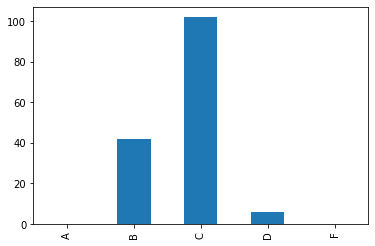

In [87]:
# Distribution of letter grades in the class
grade_counts = final_data["Final Grade"].value_counts().sort_index()

# Bar plot
grade_counts.plot.bar()

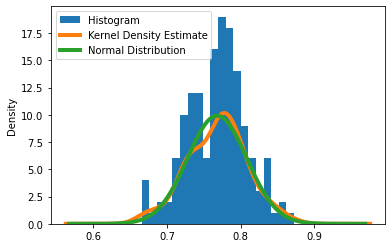

In [91]:
# Histogram of numerical scores of the students
final_data["Final Score"].plot.hist(bins=20, label="Histogram")

# Calculate kernel density estimate
final_data["Final Score"].plot.density(linewidth=4, label="Kernel Density Estimate")

# Calculate a normal distribution with mean and std dev from data
final_mean = final_data["Final Score"].mean()
final_std = final_data["Final Score"].std()
x = np.linspace(final_mean - 5 * final_std, final_mean + 5 * final_std, 200)
normal_dist = scipy.stats.norm.pdf(x, loc=final_mean, scale=final_std)

# Plot the summary statistics
plt.plot(x, normal_dist, label="Normal Distribution", linewidth=4)
plt.legend()
plt.show()
